In [1]:
#pip install joblib

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score

In [3]:
# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    return plt

In [4]:
data = pd.read_csv('../Fitness_Guardian/pushups/datasets/pushup_collection_tune.csv')

In [5]:
# Explore the dataset
print(data.head())  # Display the first few rows of the dataset

       relbow      lelbow    rarmpit    larmpit        rhip        lhip  \
0  103.270812  118.009798  40.654537  38.076561  172.257026  178.403285   
1  149.736479  178.145999  42.984085  41.866425  170.403195  179.093850   
2   81.950863  101.969308  23.885733  16.553416  177.621937  171.655894   
3  174.171405  158.956670  64.782061  67.650444  175.477363  173.210565   
4   72.647060   60.367574  44.909747  45.175063  178.508300  174.110847   

        rknee       lknee      rankle      lankle  correct_form  
0  173.514996  179.203460  102.802897  102.050366             0  
1  161.604229  171.347961  118.619143  114.300054             0  
2  169.878120  169.363342   81.231244   78.909280             0  
3  160.074057  169.055648  113.710975  118.581989             0  
4  165.663322  161.499040  109.062882  117.304405             0  


In [6]:
# Separate features (joint angles) and target variable (correct_form)
X = data.drop(columns=['correct_form'])
y = data['correct_form']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, subsample= 0.8, random_state=42)

In [9]:
# # Train the model with early stopping
# clf.fit(X_train, y_train, monitor='val', eval_set=[(X_val, y_val)], early_stopping_rounds=10)

# # Get the optimal number of estimators
# optimal_n_estimators = clf.best_iteration_

In [10]:
# # Make predictions on the test set using the trained model
# y_pred = clf.predict(X_val)

# # Calculate accuracy on the validation set
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy on validation set:", accuracy)

In [11]:
# Train the model
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=42, subsample=0.8)

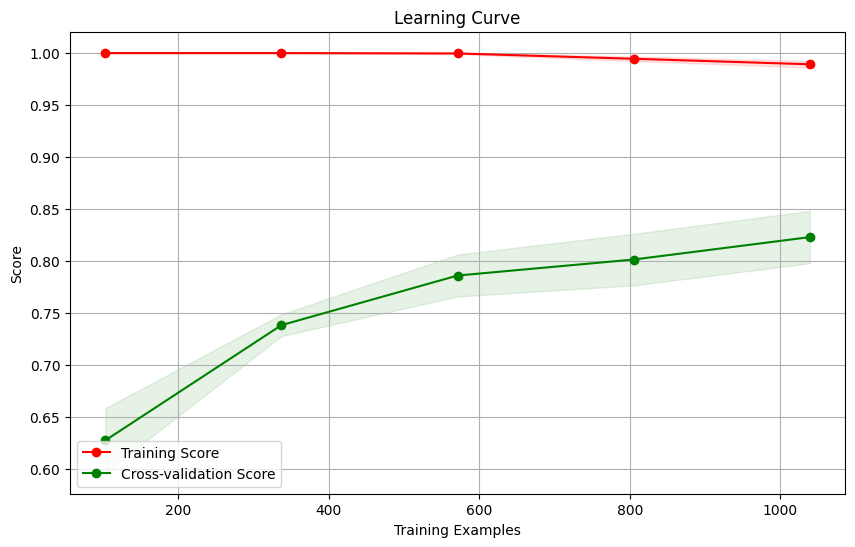

In [12]:
# Plot learning curves
plot_learning_curve(clf, X, y, cv=5, n_jobs=-1)
plt.show()

In [13]:
# Cross-validation to determine the optimal number of boosting iterations
# Use cross_val_score to perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.83173077 0.76923077 0.80769231 0.81730769 0.8115942 ]
Mean cross-validation score: 0.8075111482720179


In [14]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a DataFrame to store predicted and actual outputs
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# View the DataFrame
print(results_df)

      Actual  Predicted
1231       1          1
578        1          0
1164       1          1
722        1          1
561        0          1
...      ...        ...
199        0          0
671        0          0
1202       1          0
1049       0          0
10         0          1

[260 rows x 2 columns]


In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8192307692307692


In [16]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

   Feature  Importance
7    lknee    0.187747
5     lhip    0.177167
4     rhip    0.168561
6    rknee    0.159820
1   lelbow    0.066513
0   relbow    0.062432
8   rankle    0.051867
2  rarmpit    0.047075
3  larmpit    0.040002
9   lankle    0.038816


In [17]:
# Assume custom input stored in a dictionary
custom_input = {
    'relbow': 90.12,
    'lelbow': 90.77,
    'rarmpit': 48.22,
    'larmpit': 49.27,
    'rhip':50.69,
    'lhip':50.31,
    'rknee': 170.35,
    'lknee': 170.63,
    'rankle': 70.30,
    'lankle': 70.38
}

# custom_input = {
#     'relbow': 90.12,
#     'lelbow': 90.77,
#     'rshoulderflex': 48.22,
#     'lshoulderflex': 49.27,
#     'rhip':170.69,
#     'lhip':170.31,
# }

# Convert dictionary to DataFrame
custom_df = pd.DataFrame([custom_input])

# Make predictions using the trained model
prediction = clf.predict(custom_df)

# Print the predicted output
print("Predicted output for custom input:", prediction)

Predicted output for custom input: [0]


In [18]:
# import joblib

# # Save the trained model to a file
# joblib.dump(clf, '../Fitness_Guardian/squats/models/final_squats_model_tune.pkl')

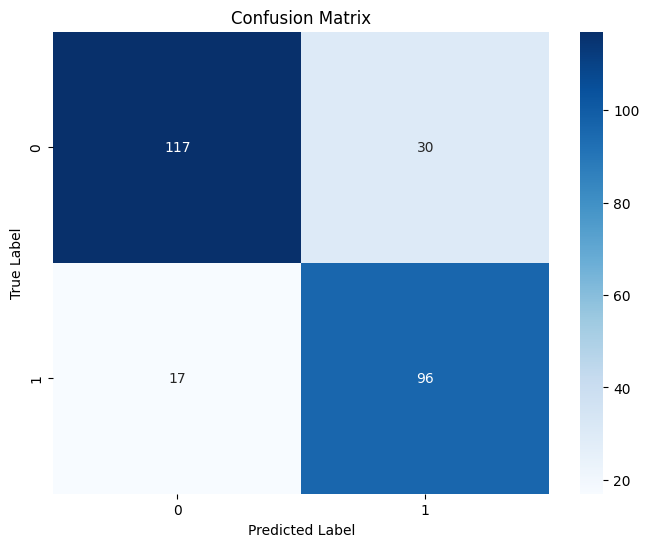

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import f1_score, precision_score, recall_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7619047619047619
Recall: 0.8495575221238938
F1 Score: 0.803347280334728


In [21]:
# Calculate ROC/AUC
# Get predicted probabilities for the positive class (class 1)
from sklearn.metrics import auc, roc_curve


y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

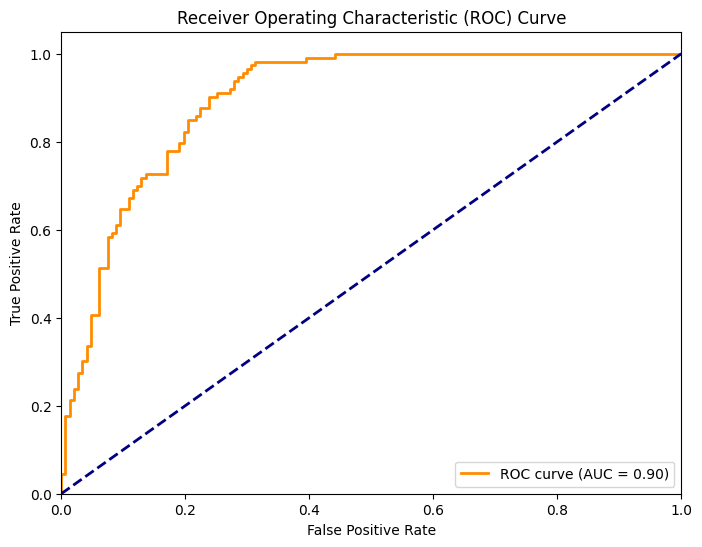

In [22]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()